In [1]:
import sys
sys.path.append("../src/")
import warnings
warnings.filterwarnings("ignore")

from eddies_detection import  get_traj_with_parcels, get_traj_with_scipy, find_eddies, find_eddies2, optimized_streamline
from plot_tools import StreamPlot
import numpy as np

d0 = 0
date_len = 2
stream_data_fname = "../data/data.nc"
runtime = 600   
delta_time = 5
particle_grid_step = 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

## Compute the list of path

In [3]:
list_path = []

for di in range(date_len):
    b = get_traj_with_scipy(d0+di, runtime, delta_time, particle_grid_step, stream_data_fname)
    
    bb = find_eddies(b)
    list_path.append(bb)

5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 


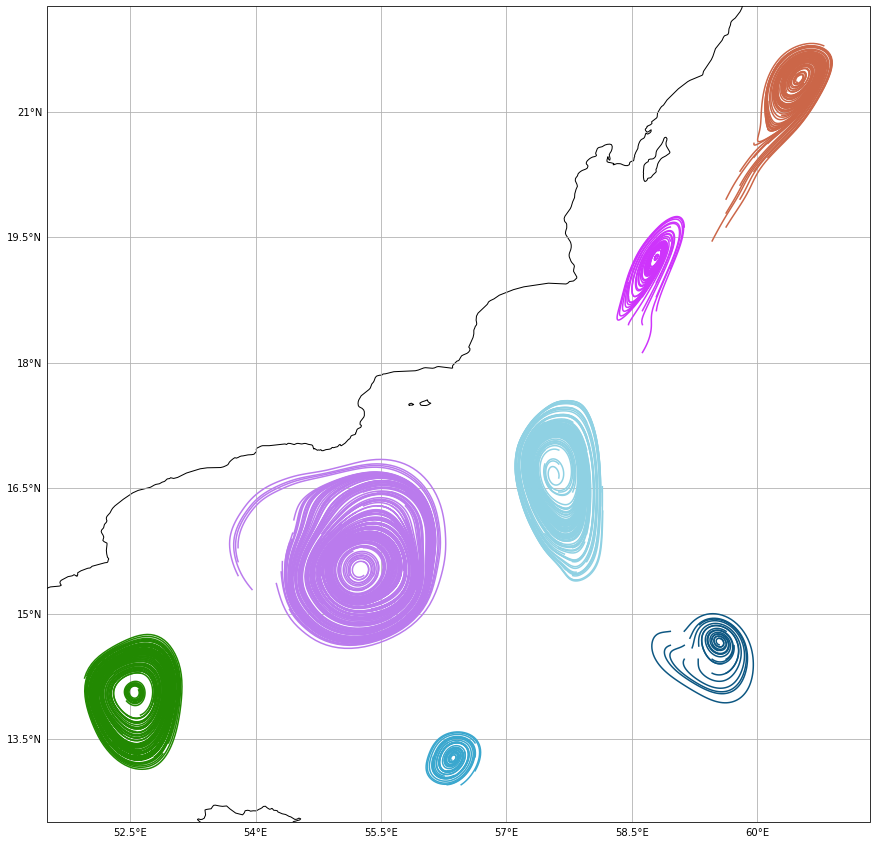

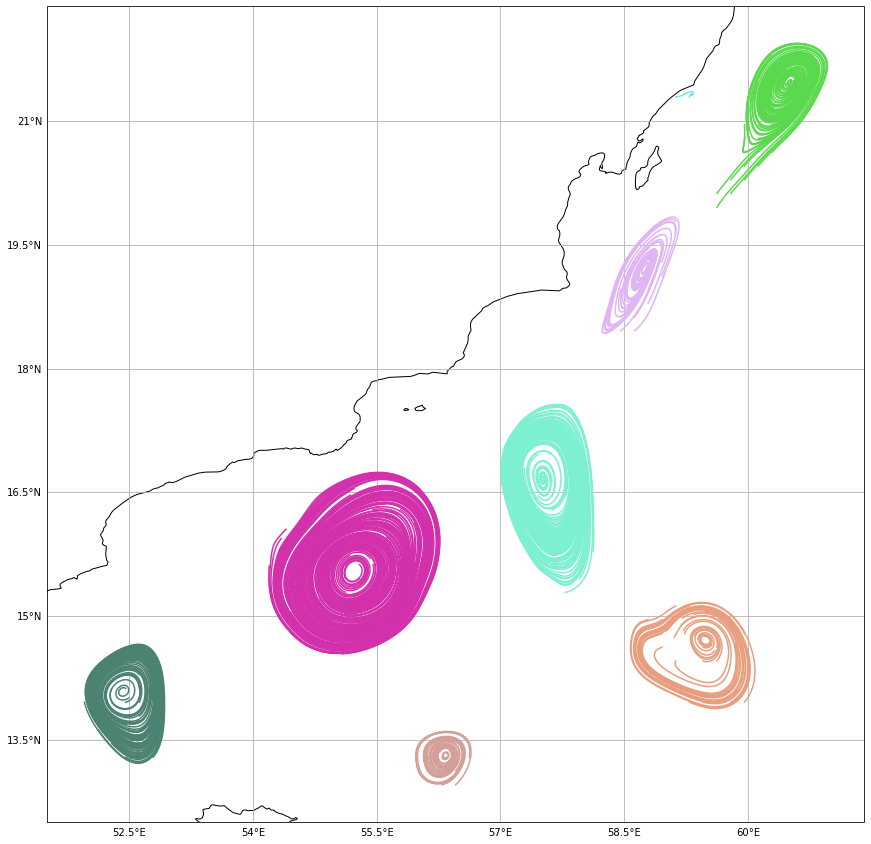

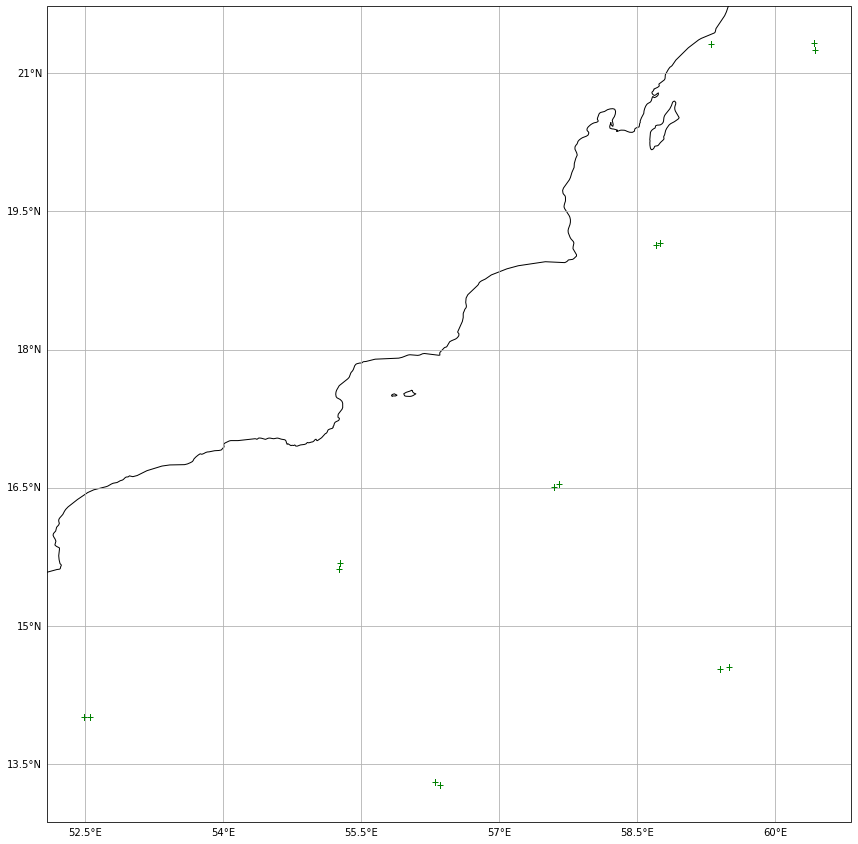

In [4]:
import random as rd


rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

for bb in list_path:
    figure = StreamPlot()
    for eddy in bb:
        line_style = rd_color()
        figure.plot_trajectories(eddy.sl_list,line_style=line_style)
    figure.show()

figure = StreamPlot()
for bb in list_path:
    figure.plot_eddies(bb,line_style='g+')

In [5]:
eddy = bb[0]
sl_list = eddy.sl_list
s = 0
new_list_path = []
for bb in list_path:
    new_eddie = []
    for eddy in bb:
        sl_list = eddy.sl_list
        for i in sl_list:
            new_eddie.append(optimized_streamline(i,delta_time))

    new_bb = find_eddies(new_eddie)
    new_list_path.append(new_bb)

KeyboardInterrupt: 

In [ ]:
rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

for bb in new_list_path:
    figure = StreamPlot()
    for eddy in bb:
        line_style = rd_color()
        figure.plot_trajectories(eddy.sl_list,line_style=line_style)
    figure.show()

## Clustering

In [24]:
from math import *
def create_list_data(list_eddies):
    K = len(list_eddies[0])
    list_center = []
    for day in list_eddies:
        for eddies in day:
            list_center.append(eddies.center)
    return K,list_center


def calc_tho(l):
    S = np.array([0 for n in range(len(l[0]))])
    for x in l:
        for j in range(len(l[0])):
            S[j] += x[j]
    return S/len(l)

def quadra_d (X,Y):
    S = 0
    for i in range(len(X)):
        S += (X[i]-Y[i])**2
    return sqrt(S)

def attrib_cluster(X,tho,d):
    distances = []
    for t in tho:
        distances.append(d(X,t))        
    i_min_d = distances.index(min(distances))
    return i_min_d


def Kmean(distance,list_eddies):
    K,list_center = create_list_data(list_eddies)
    
    cluster = [ [] for i in range(K)]
    tho = list_center[:K]

    tho = np.array(tho)
    tho_prime = np.zeros(tho.shape)
    tour = 0    
    
    while ( (tho_prime != tho).any() and tour<1000):
        tour += 1
        
        tho_prime = tho.copy()
        cluster = [ [] for i in range(K)]
        
        for day in list_eddies:
            for eddies in day:
                
                X = data
                i_min_d = attrib_cluster(X,tho,distance)
                cluster[i_min_d].append(X)
            
        for  i in range(K):
            tho[i] = calc_tho(cluster[i])
        
    return tho,cluster,tour

In [12]:
print(list_path[0][0].center)

[52.55596861 13.99970072]


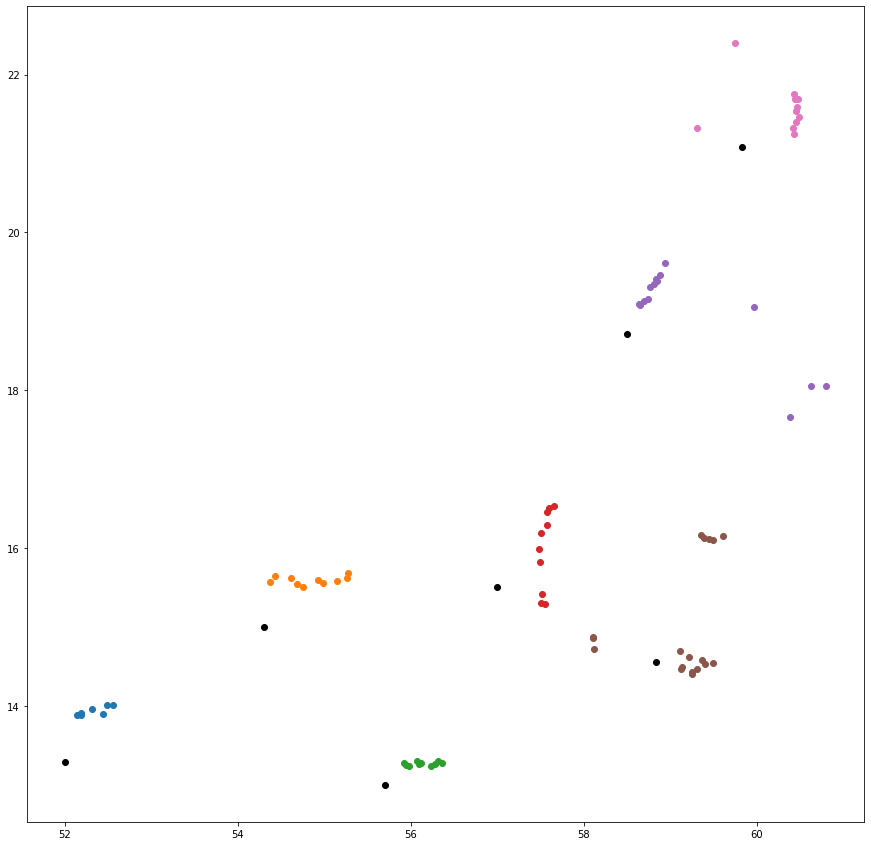

In [31]:
bary, cluster, tour = Kmean(quadra_d,list_path)

cluster1x = []
cluster1y = []
for i in bary:
    cluster1x.append(i[0])
    cluster1y.append(i[1])

plt.scatter(cluster1x,cluster1y, c = 'black' ) 

for cl in range(len(cluster)) :
    cluster1x = []
    cluster1y = []
    for i in cluster[cl]:
        cluster1x.append(i[0])
        cluster1y.append(i[1])

    plt.scatter(cluster1x,cluster1y ) 